In [3]:
#Importing Libraries

#import Client ID and Client Secret ID from config.py
from config import cid, secret

#Importing dependencies (pandas, json, requests, numpy, matplotlib)
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

#Spotipy APU for Spotify (to pull data)
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

In [4]:
# Define lists to add to csv
artist_name = []
track_name = []
popularity = []
track_id = []
audio_features = []

# Loop through the 1000 most popular songs associated with the year 2023
for i in range(0,1000,50):
    track_results = sp.search(q='year:2023', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        audio_features.append(sp.audio_features(t['id']))

In [5]:
# Make a dataframe with the track name, artist name, track id, and popularity of the track
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'popularity' : popularity})
print(track_df.shape)
track_df.head()

# Make a dataframe with the trackID and the audio features of each track
features_df = pd.DataFrame({'AudioFeatures' : audio_features})
features_df = features_df['AudioFeatures'].str[0].apply(pd.Series)

# Save both the dataframes to csv files
track_df.to_csv('track_df.csv')
features_df.to_csv('features_df.csv')

features_df.head()

(1000, 4)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.847,0.6220,1,-6.747,0,0.0903,0.119,0.000000,0.285,0.220,130.001,audio_features,4rXLjWdF2ZZpXCVTfWcshS,spotify:track:4rXLjWdF2ZZpXCVTfWcshS,https://api.spotify.com/v1/tracks/4rXLjWdF2ZZp...,https://api.spotify.com/v1/audio-analysis/4rXL...,125040,4
1,0.511,0.5320,5,-5.745,1,0.0560,0.169,0.000000,0.311,0.322,137.827,audio_features,3k79jB4aGmMDUQzEwa46Rz,spotify:track:3k79jB4aGmMDUQzEwa46Rz,https://api.spotify.com/v1/tracks/3k79jB4aGmMD...,https://api.spotify.com/v1/audio-analysis/3k79...,219724,4
2,0.557,0.7740,7,-5.275,0,0.3510,0.012,0.000000,0.396,0.397,111.975,audio_features,67nepsnrcZkowTxMWigSbb,spotify:track:67nepsnrcZkowTxMWigSbb,https://api.spotify.com/v1/tracks/67nepsnrcZko...,https://api.spotify.com/v1/audio-analysis/67ne...,246134,4
3,0.712,0.6030,8,-5.520,1,0.0262,0.186,0.000000,0.115,0.670,97.994,audio_features,1Lo0QY9cvc8sUB2vnIOxDT,spotify:track:1Lo0QY9cvc8sUB2vnIOxDT,https://api.spotify.com/v1/tracks/1Lo0QY9cvc8s...,https://api.spotify.com/v1/audio-analysis/1Lo0...,265493,4
4,0.444,0.0911,0,-17.665,1,0.0307,0.959,0.000001,0.098,0.142,78.403,audio_features,6wf7Yu7cxBSPrRlWeSeK0Q,spotify:track:6wf7Yu7cxBSPrRlWeSeK0Q,https://api.spotify.com/v1/tracks/6wf7Yu7cxBSP...,https://api.spotify.com/v1/audio-analysis/6wf7...,222370,4


**Work from CSV data**

In [6]:
# Import CSVs
# Tracks
csv_path = "track_df.csv"
track_df = pd.read_csv(csv_path)
track_df.head()

# Audio features
csv_path = "features_df.csv"
audio_features_df = pd.read_csv(csv_path)
audio_features_df.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.847,0.6220,1,-6.747,0,0.0903,0.119,0.000000,0.285,0.220,130.001,audio_features,4rXLjWdF2ZZpXCVTfWcshS,spotify:track:4rXLjWdF2ZZpXCVTfWcshS,https://api.spotify.com/v1/tracks/4rXLjWdF2ZZp...,https://api.spotify.com/v1/audio-analysis/4rXL...,125040,4
1,1,0.511,0.5320,5,-5.745,1,0.0560,0.169,0.000000,0.311,0.322,137.827,audio_features,3k79jB4aGmMDUQzEwa46Rz,spotify:track:3k79jB4aGmMDUQzEwa46Rz,https://api.spotify.com/v1/tracks/3k79jB4aGmMD...,https://api.spotify.com/v1/audio-analysis/3k79...,219724,4
2,2,0.557,0.7740,7,-5.275,0,0.3510,0.012,0.000000,0.396,0.397,111.975,audio_features,67nepsnrcZkowTxMWigSbb,spotify:track:67nepsnrcZkowTxMWigSbb,https://api.spotify.com/v1/tracks/67nepsnrcZko...,https://api.spotify.com/v1/audio-analysis/67ne...,246134,4
3,3,0.712,0.6030,8,-5.520,1,0.0262,0.186,0.000000,0.115,0.670,97.994,audio_features,1Lo0QY9cvc8sUB2vnIOxDT,spotify:track:1Lo0QY9cvc8sUB2vnIOxDT,https://api.spotify.com/v1/tracks/1Lo0QY9cvc8s...,https://api.spotify.com/v1/audio-analysis/1Lo0...,265493,4
4,4,0.444,0.0911,0,-17.665,1,0.0307,0.959,0.000001,0.098,0.142,78.403,audio_features,6wf7Yu7cxBSPrRlWeSeK0Q,spotify:track:6wf7Yu7cxBSPrRlWeSeK0Q,https://api.spotify.com/v1/tracks/6wf7Yu7cxBSP...,https://api.spotify.com/v1/audio-analysis/6wf7...,222370,4


In [7]:
#Merge the two dataframes together
merged_df = pd.merge(track_df, audio_features_df, left_on="track_id", right_on="id", how="inner")

#remove original index columns, as well as columns containing information that isn't useful for our analysis/visualizations
merged_df = merged_df.drop(columns=["Unnamed: 0_x", "Unnamed: 0_y", "type", "mode", "uri", "track_href", "analysis_url", "id"])
merged_df 

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Gunna,fukumean,4rXLjWdF2ZZpXCVTfWcshS,96,0.847,0.6220,1,-6.747,0.0903,0.1190,0.000000,0.2850,0.220,130.001,125040,4
1,Olivia Rodrigo,vampire,3k79jB4aGmMDUQzEwa46Rz,98,0.511,0.5320,5,-5.745,0.0560,0.1690,0.000000,0.3110,0.322,137.827,219724,4
2,Travis Scott,MELTDOWN (feat. Drake),67nepsnrcZkowTxMWigSbb,94,0.557,0.7740,7,-5.275,0.3510,0.0120,0.000000,0.3960,0.397,111.975,246134,4
3,Luke Combs,Fast Car,1Lo0QY9cvc8sUB2vnIOxDT,91,0.712,0.6030,8,-5.520,0.0262,0.1860,0.000000,0.1150,0.670,97.994,265493,4
4,Billie Eilish,What Was I Made For? [From The Motion Picture ...,6wf7Yu7cxBSPrRlWeSeK0Q,98,0.444,0.0911,0,-17.665,0.0307,0.9590,0.000001,0.0980,0.142,78.403,222370,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TWICE,SET ME FREE,4OtVQ2ZxS7yigIjGz5yKg1,77,0.756,0.8310,5,-2.536,0.1410,0.0966,0.000000,0.0499,0.703,113.025,181680,4
996,Sexyy Red,Pound Town (and Tay Keith),4KSRdah26ypIXVNZPHmzO3,68,0.590,0.6750,2,-7.950,0.4580,0.3890,0.000000,0.1670,0.443,178.410,129467,4
997,Jessie Murph,How Could You,7wB9sL81rFRGhRt6msZ9CV,73,0.573,0.1700,11,-10.576,0.0555,0.8340,0.000003,0.1080,0.280,146.749,187813,3
998,The Weeknd,"Fill The Void (with Lily Rose Depp, Ramsey)",010ZkIVv6Ay5vqqHVCCiKB,79,0.247,0.3950,5,-9.082,0.0438,0.2800,0.000223,0.1710,0.110,151.962,185751,4


In [8]:
# Create a function that allows us to create a scatter plot with any two of the columns in the data frame
# It also creates a linear regression line and calculates the r value
# The function takes in the x and y values as well as making the title of the graph equal to the column names with "vs." in between

def music_plot(x_values, y_values):
    # Generate scatter plot using matplotlib (plt.scatter)
    plt.scatter(x_values, y_values, marker="o", facecolors="skyblue", edgecolors="black")

    # Generate the titles and labels for the graph, capitalize the first letter of each word
    plt.title(f"{x_values.name.capitalize()} vs. {y_values.name.capitalize()}")
    plt.xlabel(x_values.name.capitalize())
    plt.ylabel(y_values.name.capitalize())

    # Add a grid to the graph
    plt.grid()

    # Calculate the linear regression line
    x_values = x_values.astype('float')
    y_values = y_values.astype('float')
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")

    # Plot and annotate the linear regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

    # Show the figure
    plt.show()

The r-value is: -0.05392943041965877


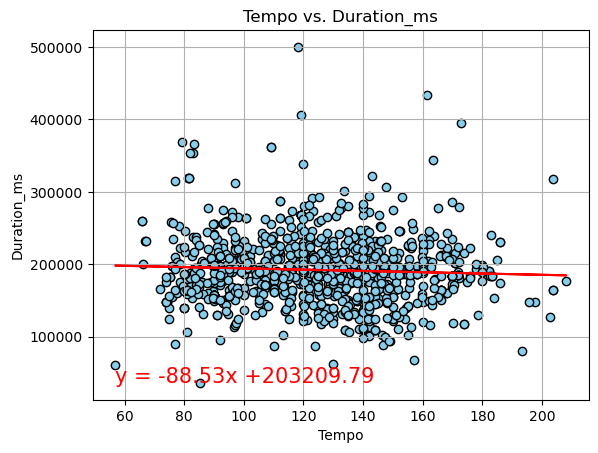

In [9]:
# Test the function music_plot()
music_plot(merged_df['tempo'], merged_df['duration_ms'])

The r-value is: 0.1295891752027338


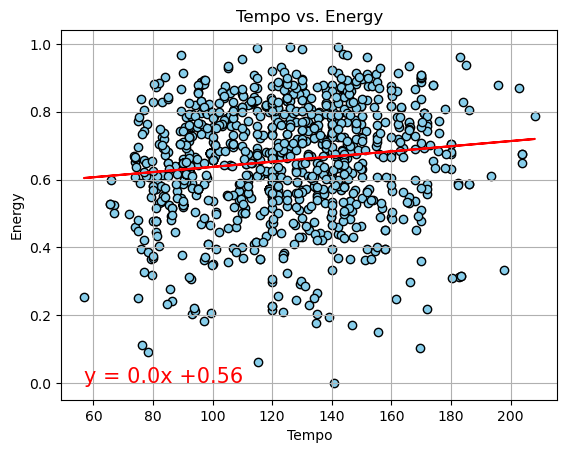

In [10]:
# Test the function music_plot()
music_plot(merged_df['tempo'], merged_df['energy'])

In [11]:
# Create a new dataframe using merged_df called artist_counts_df, 
# The first column should be unique artist names from merged_df["artist_name"]
# Group by artist and count the number of songs in the merged_df for the artist in a second column called "track_count"
# The third column should be a column called "tracks" of dictionaries with the following format {track_1 name:track_1 id}, based on merged_df["track_name"] and merged_df["track_id"]

# Create dataframe
artist_counts_df = pd.DataFrame()

# Add columns
# Artist name from merged_df["artist_name"]
artist_counts_df["artist_name"] = merged_df["artist_name"].unique()
# Track count from merged_df grouped by artist
artist_counts_df["track_count"] = merged_df.groupby("artist_name").count()["track_id"].values
# Tracks and track ids stored in a dictionary
artist_counts_df["tracks"] = merged_df.groupby("artist_name").apply(lambda x: dict(zip(x["track_name"], x["track_id"]))).values

# Order by track_count descending
artist_counts_df = artist_counts_df.sort_values("track_count", ascending=False)

# Display sample data from artist_counts_df
artist_counts_df.head()

,artist_name,track_count,tracks
246,Brenn!,72,"{'Chemical': '0f2KTrvhvkj3ZrzcCyhXUK', 'Enough..."
144,Calvin Harris,65,"{'TQG': '1AIpPeP8CuPf5ZpxwUCbdF', 'AMARGURA': ..."
102,Lizzo,51,"{'Classy 101': '4sLpFdUQfyQSSFs3V9um1o', 'Niña..."
294,GenriX,42,{'Popular (with Playboi Carti & Madonna) - Mus...
209,Brray,36,"{'Last Night': '7K3BhSpAxZBznislvUMVtn', 'Thin..."


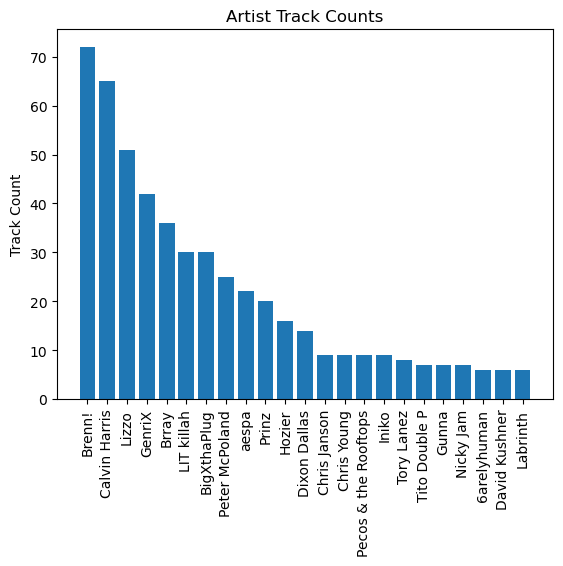

In [12]:
# Create a bar chart of the data in the artist_counts_df dataframe, plotting all artists where artist_counts_df['track_count'] is greater than 5.
# Create the bar chart using the matplotlib.pyplot.bar() function.
# Use the artist_counts_df['artist_name'] column for the x-axis labels.
# Use the artist_counts_df['track_count'] column for the y-axis values.
# Use the artist_counts_df['artist_name'] column for the tick labels.
# Use the plt.xticks() function to rotate the tick labels 90 degrees.
# Use the plt.ylabel() function to add the y-axis label.
# Use the plt.title() function to add the chart title.
# Use the plt.show() function to display the chart.

filtered_df = artist_counts_df[artist_counts_df['track_count'] > 5]

# Create the bar chart using the filtered dataframe
plt.bar(filtered_df['artist_name'], filtered_df['track_count'])

# Set the x-axis tick labels to the artist names and rotate them 90 degrees
plt.xticks(filtered_df['artist_name'], rotation=90)

# Add the y-axis label
plt.ylabel('Track Count')

# Add the chart title
plt.title('Artist Track Counts')

# Display the chart
plt.show()


In [13]:
# Create a summary statistics dataframe that includes the summary statistics for all the numerical columns in the merged_df dataframe
summary_df = merged_df.describe()

# Use the Pandas transpose function to flip the axis
summary_df = summary_df.transpose()

# Use the Pandas to_csv function to save the summary statistics dataframe to a csv file
summary_df.to_csv('summary_statistics.csv')

# Check dataframe info
summary_df.head()

,count,mean,std,min,25%,50%,75%,max
popularity,1000.0,65.250000,29.272109,0.000000,69.00000,76.000,82.0000,100.000
danceability,1000.0,0.663101,0.148057,0.143000,0.55775,0.676,0.7820,0.971
energy,1000.0,0.654763,0.165855,0.000116,0.55975,0.670,0.7820,0.991
key,1000.0,5.103000,3.602411,0.000000,1.00000,5.000,8.0000,11.000
loudness,1000.0,-6.112844,2.616450,-37.894000,-7.27700,-5.627,-4.4335,1.002


In [53]:
#Fetch Genre Information for Each Artist:

genre_list = []

for artist_name in merged_df['artist_name']:
    artist_name_str = str(artist_name)  
    artist_info = sp.search(q='artist:' + artist_name_str, type='artist')
    if artist_info['artists']['items']:
        genres = artist_info['artists']['items'][0]['genres']
        genre_list.append(genres)
    else:
        genre_list.append([])  

genre_df = merged_df.copy()
# Add the list of genres to a new DataFrame
genre_df['genres'] = genre_list





In [54]:
genre_df.head()

,artist_name,track_name,track_id,popularity,genres,danceability_x,energy_x,key_x,loudness_x,mode_x,...,instrumentalness_y,liveness_y,valence_y,tempo_y,type_y,uri_y,track_href_y,analysis_url_y,duration_ms_y,time_signature_y
0,Gunna,fukumean,4rXLjWdF2ZZpXCVTfWcshS,96,"[atl hip hop, melodic rap, rap, trap]",0.847,0.6220,1,-6.747,0,...,0.000000,0.285,0.220,130.001,audio_features,spotify:track:4rXLjWdF2ZZpXCVTfWcshS,https://api.spotify.com/v1/tracks/4rXLjWdF2ZZp...,https://api.spotify.com/v1/audio-analysis/4rXL...,125040,4
1,Olivia Rodrigo,vampire,3k79jB4aGmMDUQzEwa46Rz,98,[pop],0.511,0.5320,5,-5.745,1,...,0.000000,0.311,0.322,137.827,audio_features,spotify:track:3k79jB4aGmMDUQzEwa46Rz,https://api.spotify.com/v1/tracks/3k79jB4aGmMD...,https://api.spotify.com/v1/audio-analysis/3k79...,219724,4
2,Travis Scott,MELTDOWN (feat. Drake),67nepsnrcZkowTxMWigSbb,94,"[hip hop, rap, slap house]",0.557,0.7740,7,-5.275,0,...,0.000000,0.396,0.397,111.975,audio_features,spotify:track:67nepsnrcZkowTxMWigSbb,https://api.spotify.com/v1/tracks/67nepsnrcZko...,https://api.spotify.com/v1/audio-analysis/67ne...,246134,4
3,Luke Combs,Fast Car,1Lo0QY9cvc8sUB2vnIOxDT,91,"[contemporary country, country]",0.712,0.6030,8,-5.520,1,...,0.000000,0.115,0.670,97.994,audio_features,spotify:track:1Lo0QY9cvc8sUB2vnIOxDT,https://api.spotify.com/v1/tracks/1Lo0QY9cvc8s...,https://api.spotify.com/v1/audio-analysis/1Lo0...,265493,4
4,Billie Eilish,What Was I Made For? [From The Motion Picture ...,6wf7Yu7cxBSPrRlWeSeK0Q,98,"[art pop, electropop, pop]",0.444,0.0911,0,-17.665,1,...,0.000001,0.098,0.142,78.403,audio_features,spotify:track:6wf7Yu7cxBSPrRlWeSeK0Q,https://api.spotify.com/v1/tracks/6wf7Yu7cxBSP...,https://api.spotify.com/v1/audio-analysis/6wf7...,222370,4


In [57]:
# Create dataframe
from collections import Counter

# Flatten the list of genres
all_genres = [genre for genres_list in genre_df['genres'] for genre in genres_list]

# Count the occurrences of each genre
genre_counts = Counter(all_genres)

# Create a new DataFrame with the genre counts
genre_count_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['genre_count'])
genre_count_df.index.name = 'genre'

# Sort the DataFrame by genre count in descending order
genre_count_df = genre_count_df.sort_values(by='genre_count', ascending=False)

# Display the new DataFrame
genre_count_df


,genre_count
genre,
rap,234
pop,228
urbano latino,156
trap latino,154
melodic rap,135
...,...
rap catala,1
neoperreo,1
melancholia,1


The r-value is: -0.20958153822473036


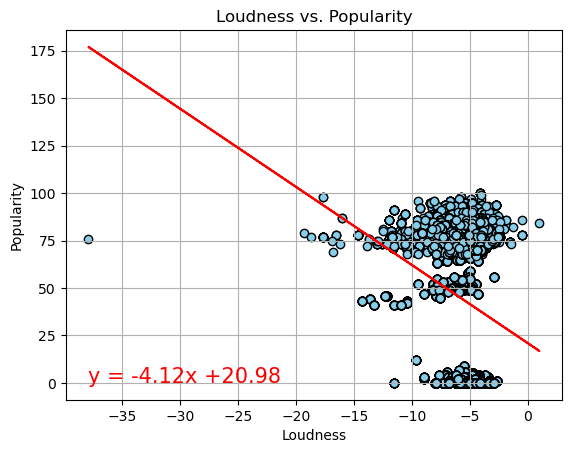

In [26]:
#Is there any connection between the loudness of a track and its popularity?
music_plot(merged_df['loudness'], merged_df['popularity'])